In [68]:
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import json
from sklearn.linear_model import LogisticRegression

In [7]:
# Directory containing the stock data files
folder_path = 'C:/Users/Owner/Desktop/Machine Learning/tech_stock'

# Create a dictionary to store the dataframes for each company
company_data = {}

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Check if the file is a text file
        company_name = filename[:-4]  # Use the filename (without the .txt) as the company name

        # Load the data into a DataFrame
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, delimiter="\t", header=None,
                         names=["Date", "Movement %", "Open", "High", "Low", "Close", "Volume"])

        # Convert the 'Date' column to datetime
        df["Date"] = pd.to_datetime(df["Date"])

        # Store the DataFrame in the dictionary with the company name as the key
        company_data[company_name] = df

# Example: Access the DataFrame for a specific company (e.g., 'AAPL')
AAPL_df = company_data['AAPL']
AMZN_df = company_data['AMZN']
CHL_df = company_data['CHL']
CSCO_df = company_data['CSCO']
FB_df = company_data['FB']
GOOG_df = company_data['GOOG']
INTC_df = company_data['INTC']
MSFT_df = company_data['MSFT']
ORCL_df = company_data['ORCL']
T_df = company_data['T']
TSM_df = company_data['TSM']
VZ_df = company_data['VZ']

print(ORCL_df.head())

        Date  Movement %      Open      High       Low     Close      Volume
0 2017-09-01    0.005762  0.000397  0.010928  0.000397  0.289997   8651000.0
1 2017-08-31    0.010643  0.001606  0.014458  0.000803  0.530003  12958100.0
2 2017-08-30    0.007078  0.001011  0.010111 -0.001820  0.349998   6957400.0
3 2017-08-29    0.004265 -0.007311  0.006702 -0.009951  0.209999   7245900.0
4 2017-08-28    0.000000  0.003046  0.003046 -0.004062  0.000000   6211300.0


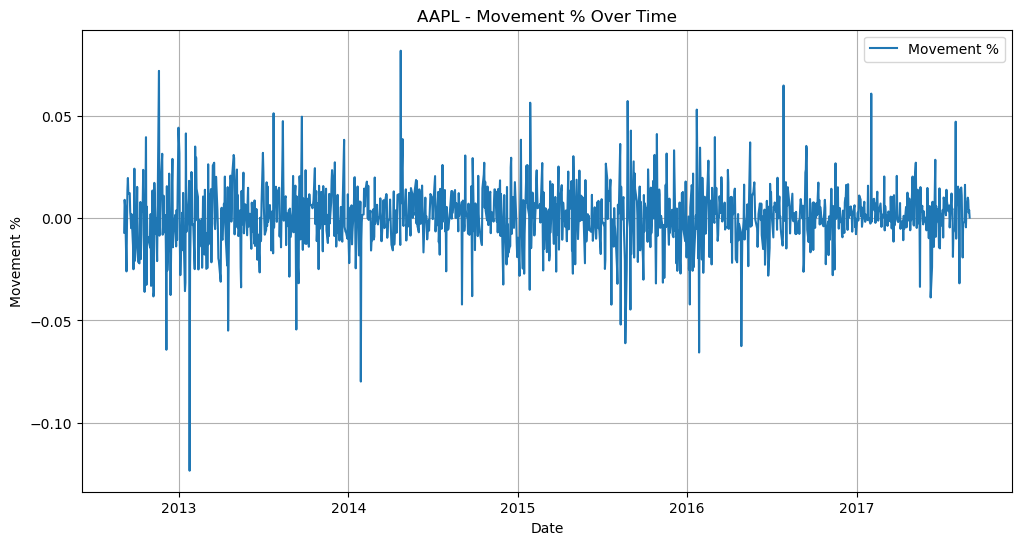

In [9]:
import matplotlib.pyplot as plt

# Plot Movement % over time
plt.figure(figsize=(12, 6))
plt.plot(AAPL_df['Date'], AAPL_df['Movement %'], label='Movement %')
plt.title("AAPL - Movement % Over Time")
plt.xlabel("Date")
plt.ylabel("Movement %")
plt.grid(True)
plt.legend()
plt.show()

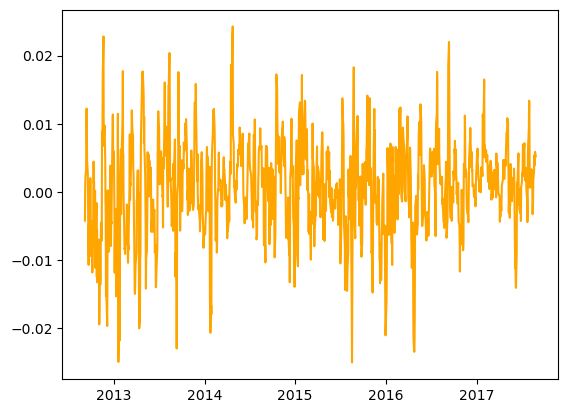

In [11]:
AAPL_df['Smoothed'] = AAPL_df['Movement %'].rolling(window=5).mean()
plt.plot(AAPL_df['Date'], AAPL_df['Smoothed'], label='5-day Avg', color='orange')


In [17]:
def plot_movement(company_data, ticker, window=14):
    """
    Plot raw and smoothed Movement % over time for a given company.

    Parameters:
        company_data (dict): Dictionary of DataFrames keyed by ticker symbol.
        ticker (str): The ticker symbol of the company to plot (e.g., 'AAPL').
        window (int): Rolling window size for smoothing (default is 5 days).
    """
    if ticker not in company_data:
        print(f"Ticker '{ticker}' not found in company data.")
        return

    df = company_data[ticker].copy()
    
    # Ensure the data is sorted by date
    df = df.sort_values(by='Date')

    # Compute the smoothed values
    df['Smoothed'] = df['Movement %'].rolling(window=window).mean()

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Movement %'], label='Raw Movement %', alpha=0.7)
    plt.plot(df['Date'], df['Smoothed'], label=f'Smoothed ({window}-day Avg)', color='orange', linewidth=2)

    plt.title(f"{ticker} - Raw vs Smoothed Movement % Over Time")
    plt.xlabel("Date")
    plt.ylabel("Movement %")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [19]:
def plot_close(company_data, ticker, window=14):
    """
    Plot raw and smoothed Movement % over time for a given company.

    Parameters:
        company_data (dict): Dictionary of DataFrames keyed by ticker symbol.
        ticker (str): The ticker symbol of the company to plot (e.g., 'AAPL').
        window (int): Rolling window size for smoothing (default is 5 days).
    """
    if ticker not in company_data:
        print(f"Ticker '{ticker}' not found in company data.")
        return

    df = company_data[ticker].copy()
    
    # Ensure the data is sorted by date
    df = df.sort_values(by='Date')

    # Compute the smoothed values
    df['Smoothed'] = df['Close'].rolling(window=window).mean()

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Close'], label='Raw Close', alpha=0.7)
    plt.plot(df['Date'], df['Smoothed'], label=f'Smoothed ({window}-day Avg)', color='orange', linewidth=2)

    plt.title(f"{ticker} - Raw vs Smoothed Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


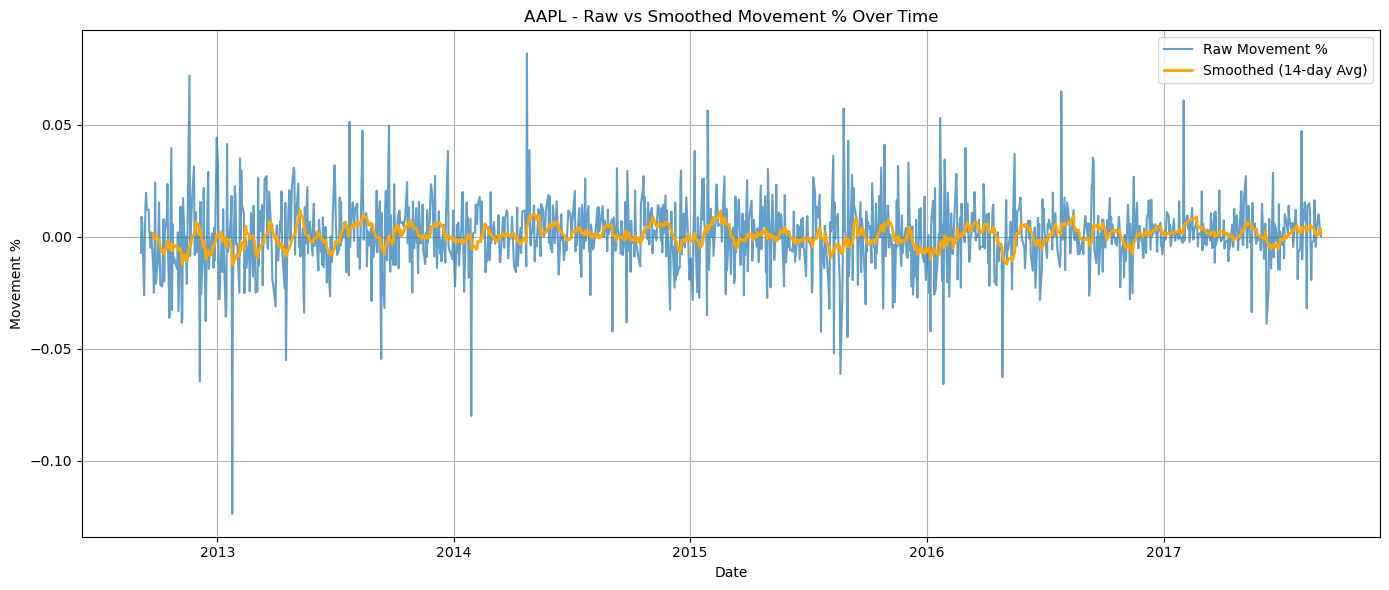

In [21]:
plot_movement(company_data, ticker='AAPL')

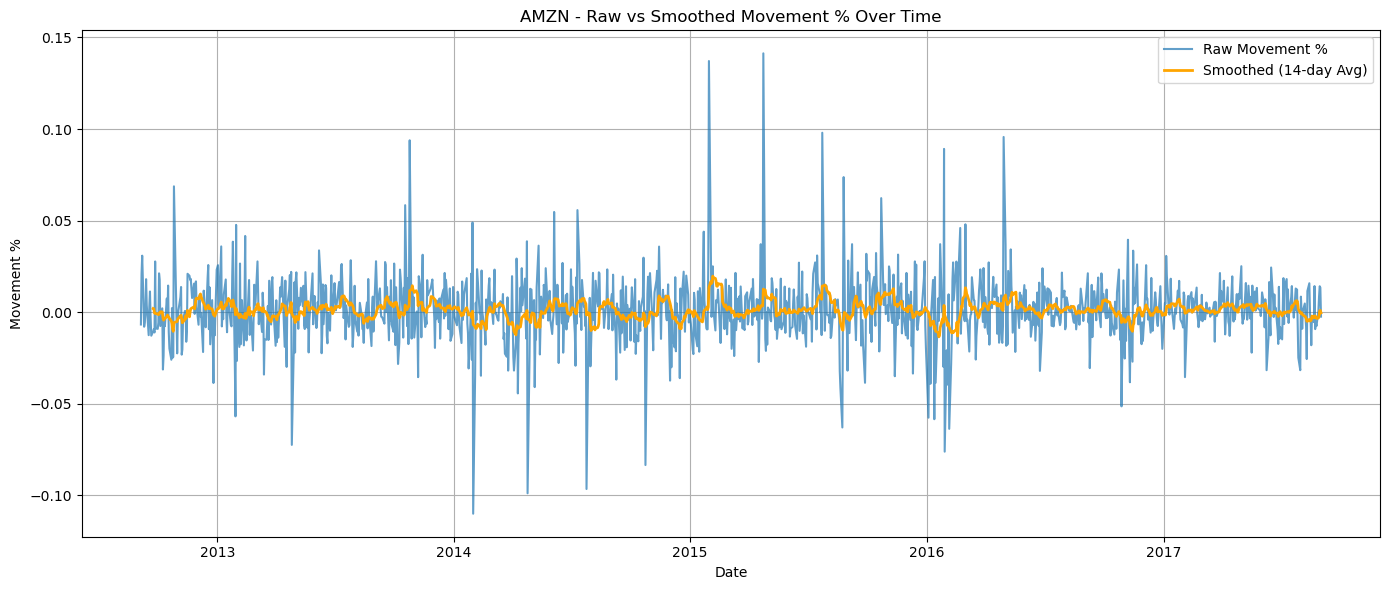

In [23]:
plot_movement(company_data, ticker='AMZN')

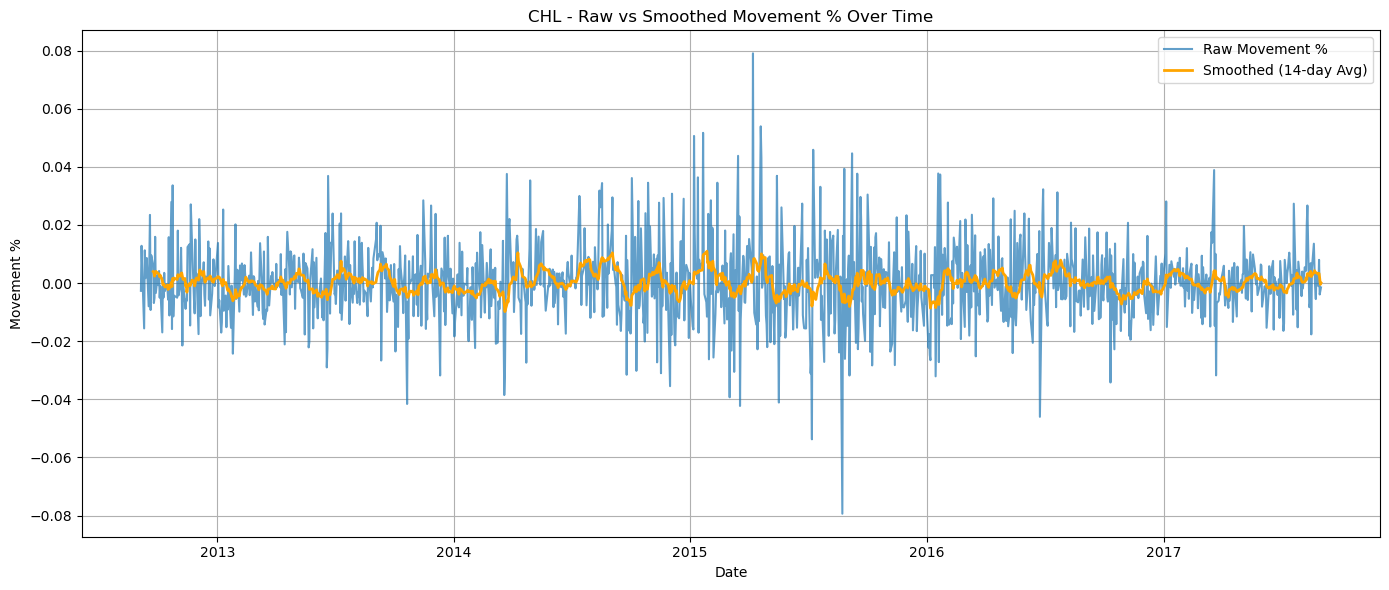

In [25]:
plot_movement(company_data, ticker='CHL')

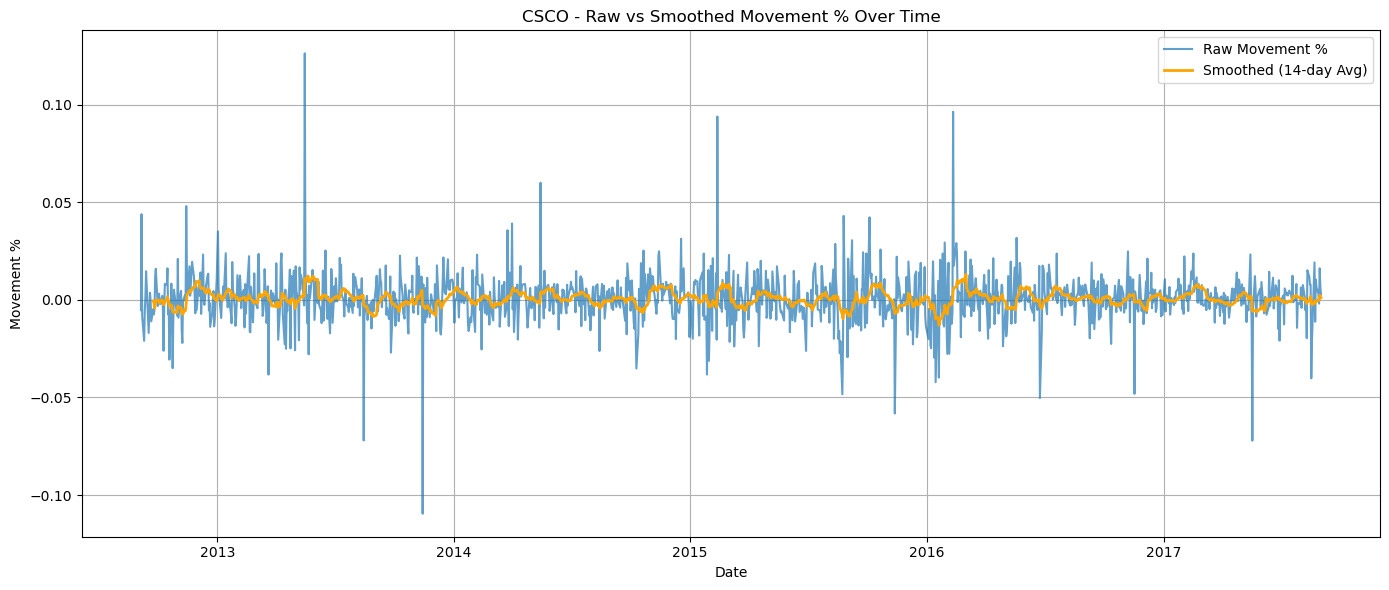

In [27]:
plot_movement(company_data, ticker='CSCO')

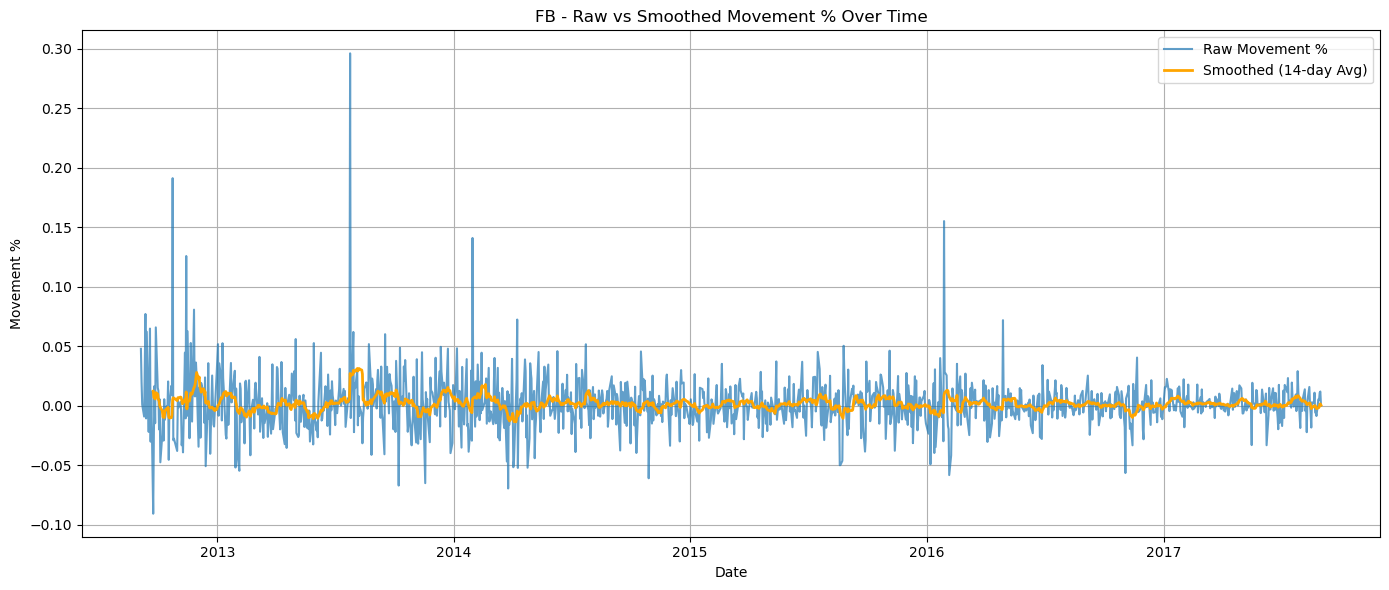

In [29]:
plot_movement(company_data, ticker='FB')

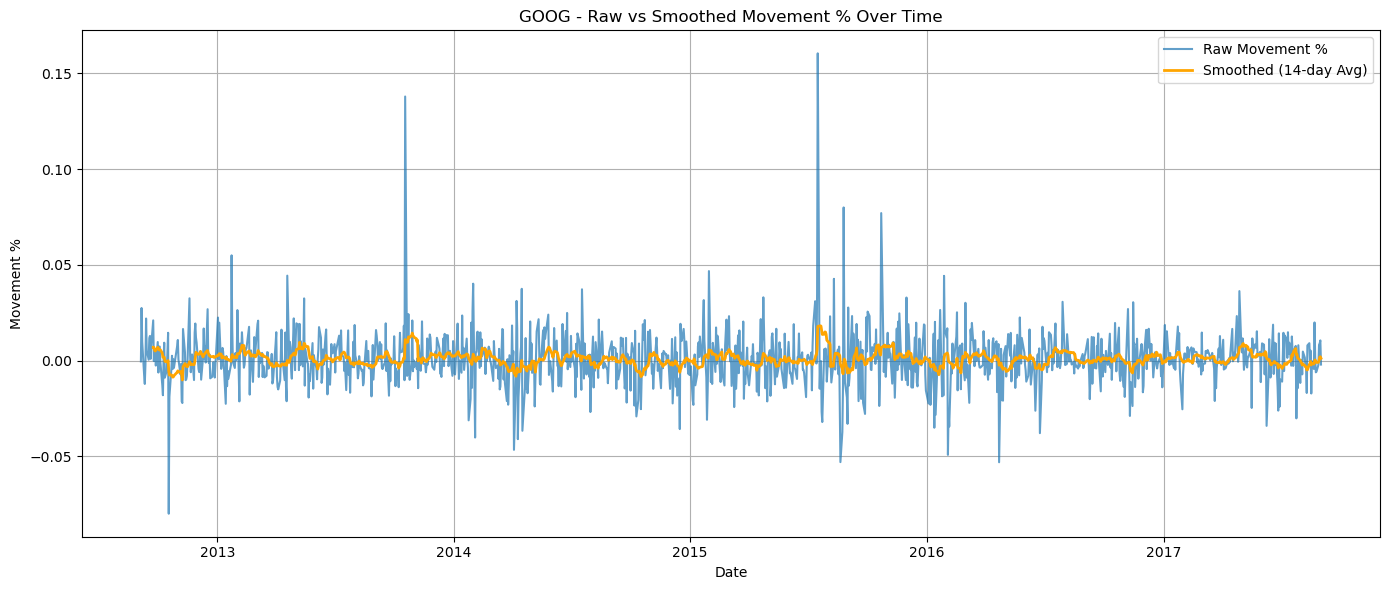

In [31]:
plot_movement(company_data, ticker='GOOG')

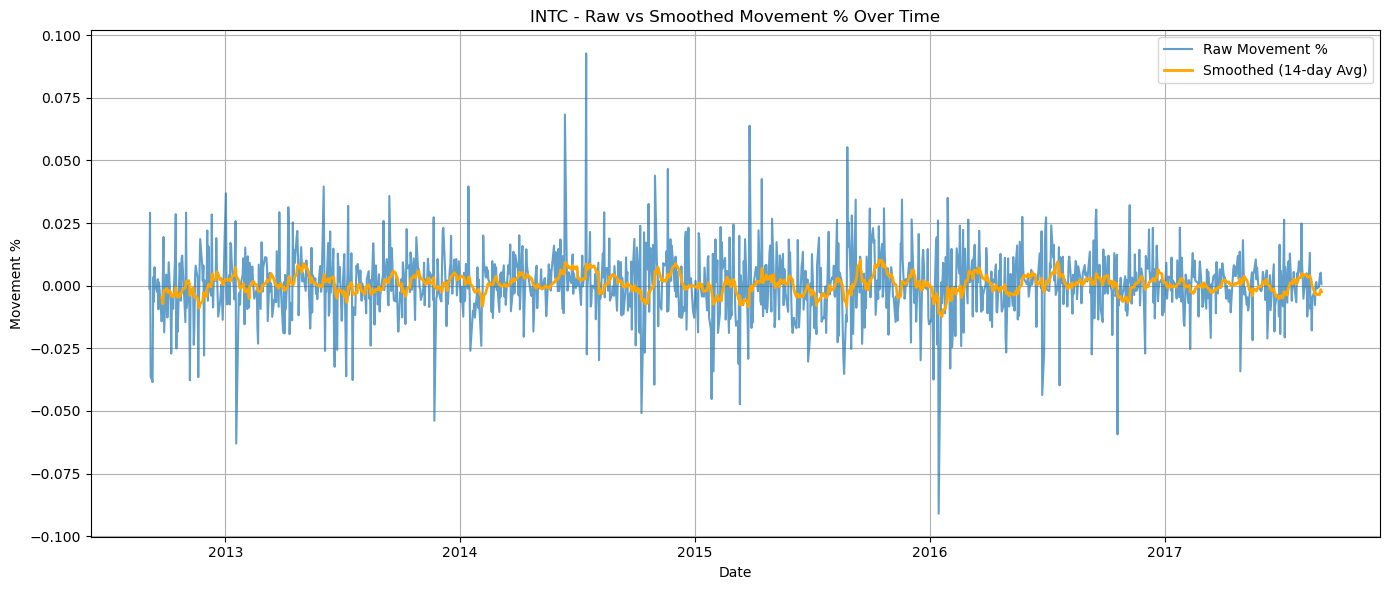

In [33]:
plot_movement(company_data, ticker='INTC')

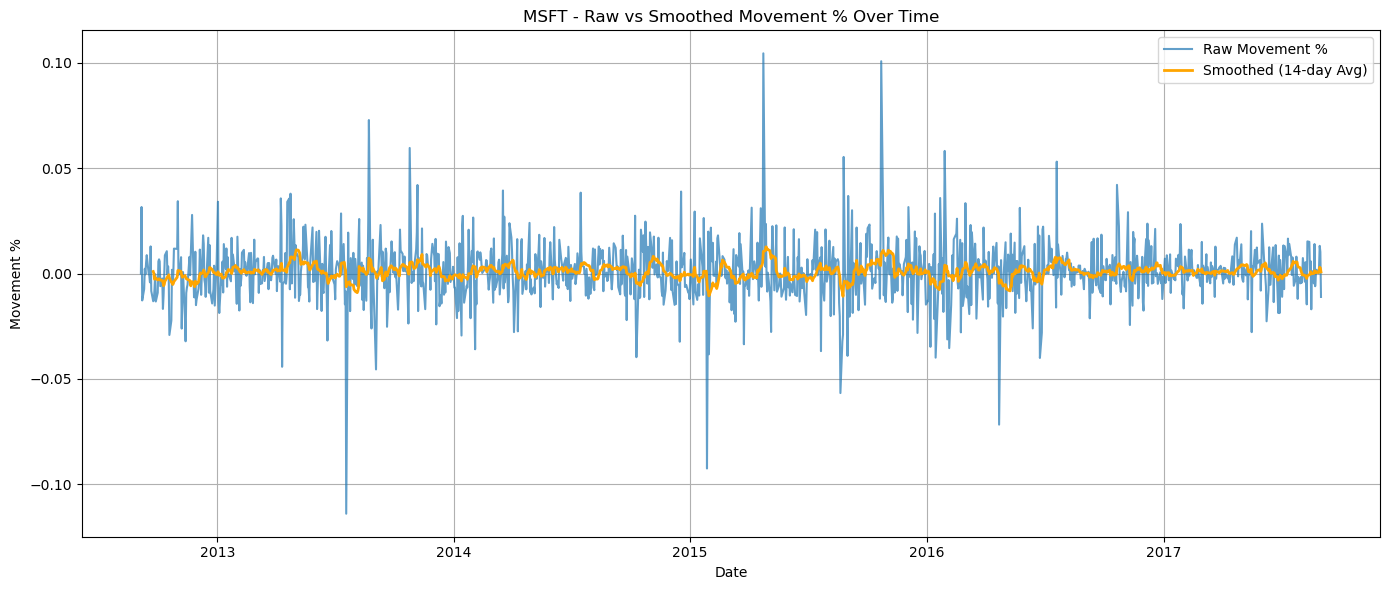

In [35]:
plot_movement(company_data, ticker='MSFT')

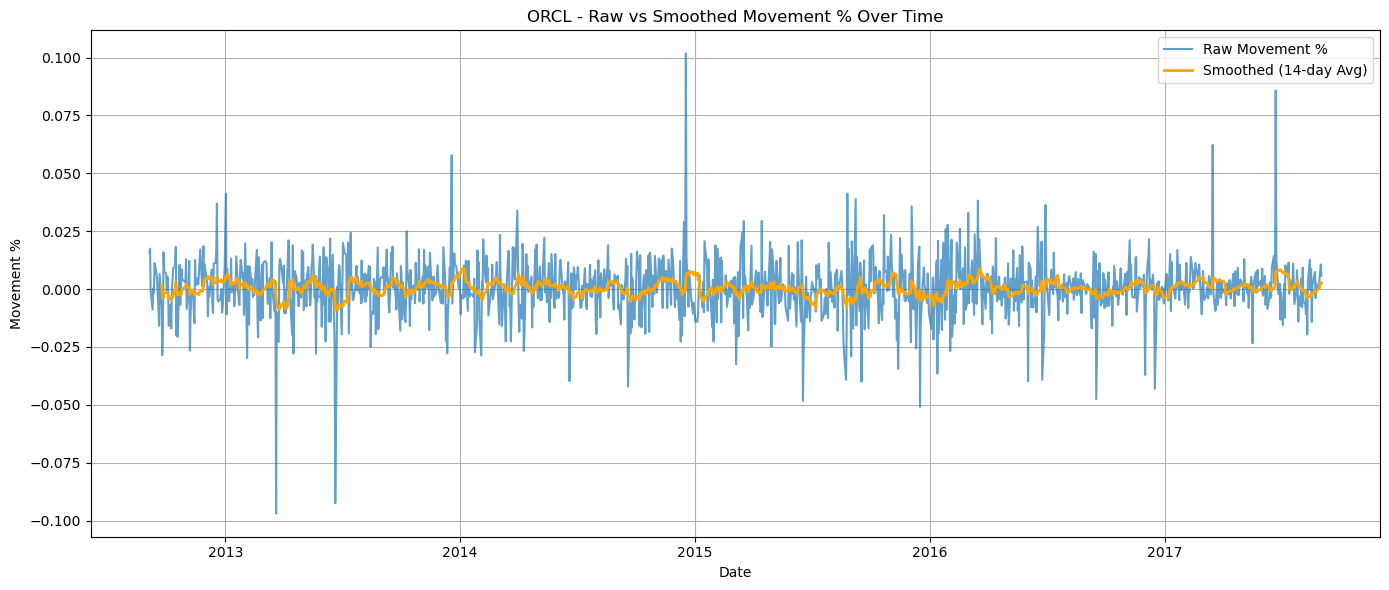

In [37]:
plot_movement(company_data, ticker='ORCL')

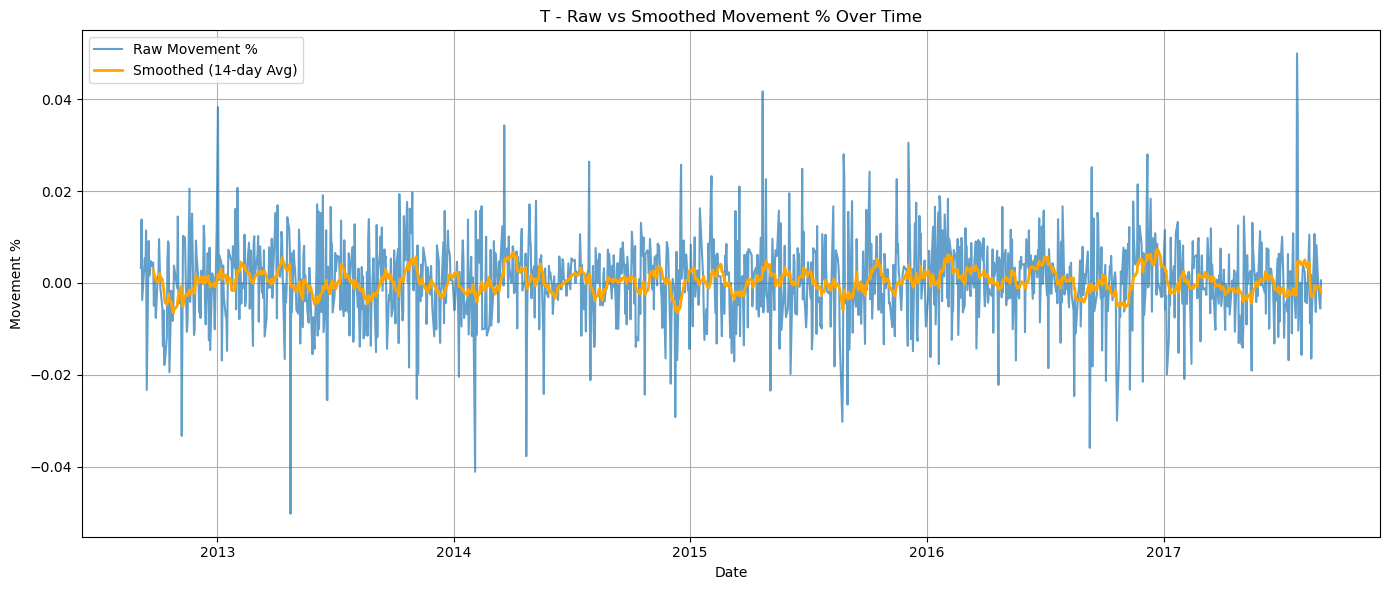

In [39]:
plot_movement(company_data, ticker='T')

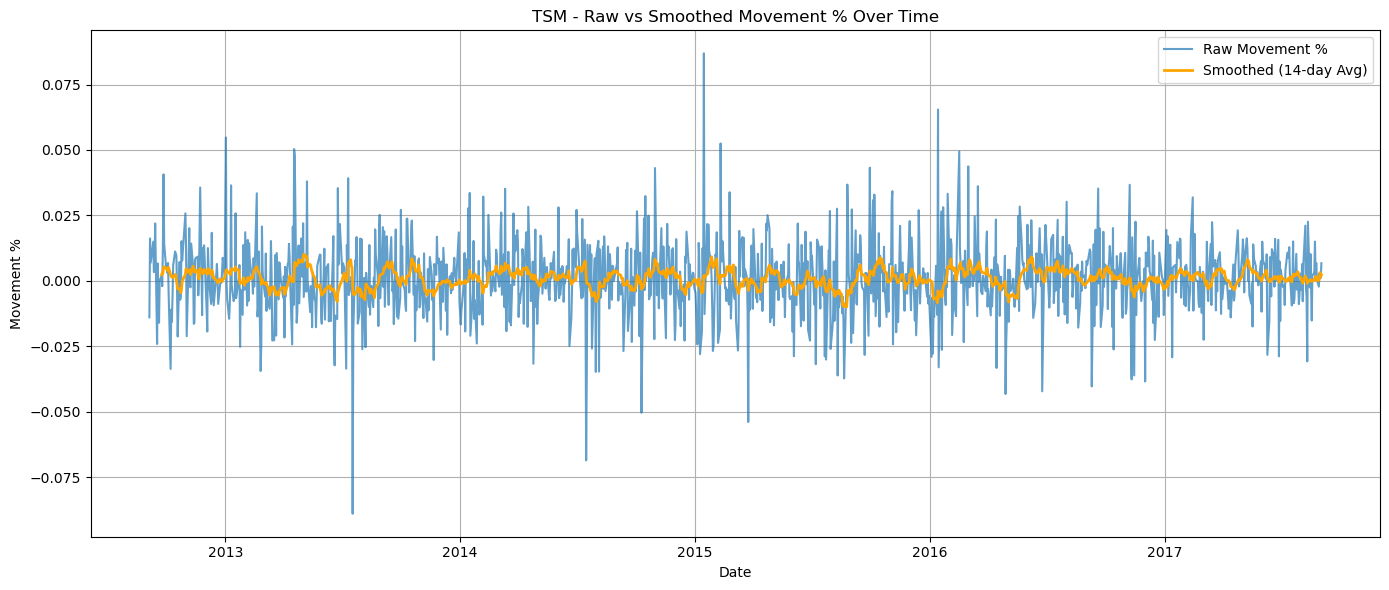

In [41]:
plot_movement(company_data, ticker='TSM')

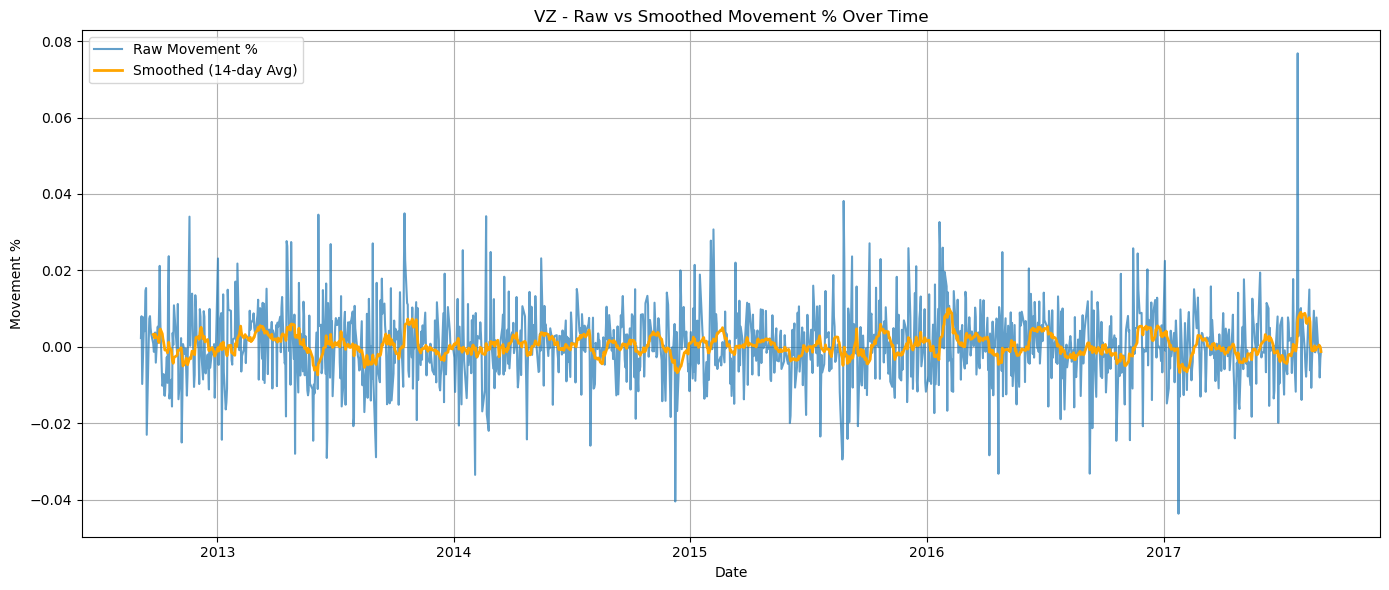

In [43]:
plot_movement(company_data, ticker='VZ')

In [45]:
# Normalize the sentiment score based on its label
def normalize_sentiment(label, score):
    if label == "positive":
        return score  # Keep positive scores as they are
    elif label == "neutral":
        return 0  # Neutral sentiment contributes 0 to the average
    elif label == "negative":
        return -score  # Negative sentiment becomes negative
    else:
        return 0  # Default to 0 for any unrecognized labels

def load_sentiment_data(sentiment_folder):
    sentiment_data = {}

    # Loop through all companies in the folder
    for company in os.listdir(sentiment_folder):
        print(f"Checking: {company}")  # debug
        company_folder = os.path.join(sentiment_folder, company)
        if not os.path.isdir(company_folder):
            print(f"Skipped {company} (not a directory)")
            continue

        daily_scores = []

        # Loop through all files for the company
        for file_name in os.listdir(company_folder):
            file_path = os.path.join(company_folder, file_name)

            # Ignore hidden or system files
            if file_name.startswith('.') or not os.path.isfile(file_path):
                continue

            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    scores = []
                    for line in f:
                        tweet = json.loads(line.strip())
                        sentiment = tweet.get("sentiment", {})
                        label = sentiment.get("label")
                        score = sentiment.get("score")
                        if score is not None and label:
                            # Normalize sentiment based on the label
                            normalized_score = normalize_sentiment(label, score)
                            scores.append(normalized_score)

                # If there are scores for the day, compute the average sentiment
                if scores:
                    avg_score = sum(scores) / len(scores)
                    date_str = file_name.replace('.json', '')  # Use filename as date
                    daily_scores.append({"Date": date_str, "Sentiment": avg_score})

            except Exception as e:
                print(f"Error reading {file_path}: {e}")

        # If daily scores are collected, process and store them
        if daily_scores:
            df = pd.DataFrame(daily_scores)
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df.dropna(subset=['Date'], inplace=True)  # Remove rows with invalid dates
            df.sort_values(by="Date", inplace=True)  # Sort by date
            sentiment_data[company] = df
            print(f"Loaded {len(df)} days for {company}")
        else:
            print(f"No data collected for {company}")

    return sentiment_data


# Load data
sentiment_folder = 'C:/Users/Owner/Desktop/Machine Learning/sentiment'
sentiment_data = load_sentiment_data(sentiment_folder)

# Show example
if "AAPL" in sentiment_data:
    print(sentiment_data["AAPL"].head())
else:
    print("AAPL data not found.")


Checking: AAPL
Loaded 696 days for AAPL
Checking: AMZN
Loaded 671 days for AMZN
Checking: CHL
Loaded 127 days for CHL
Checking: CSCO
Loaded 514 days for CSCO
Checking: FB
Loaded 692 days for FB
Checking: GOOG
Loaded 680 days for GOOG
Checking: INTC
Loaded 566 days for INTC
Checking: MSFT
Loaded 640 days for MSFT
Checking: ORCL
Loaded 360 days for ORCL
Checking: T
Loaded 684 days for T
Checking: TSM
Loaded 106 days for TSM
Checking: VZ
Loaded 461 days for VZ
        Date  Sentiment
0 2014-01-01   0.074968
1 2014-01-02  -0.054759
2 2014-01-03  -0.201482
3 2014-01-04   0.000000
4 2014-01-05   0.000000


In [47]:
# Function to find missing dates for each company's sentiment data
def find_missing_dates(sentiment_data):
    # Define the full date range (Jan 1st 2014 to Dec 31st 2015)
    all_dates = pd.date_range(start="2014-01-01", end="2015-12-31", freq='D')

    # Loop through each company's data to check for missing dates
    for company, df in sentiment_data.items():
        # Convert the 'Date' column to a set of dates
        company_dates = set(df['Date'])

        # Find the missing dates by subtracting the company dates from the full date range
        missing_dates = set(all_dates) - company_dates

        if missing_dates:
            print(f"Missing dates for {company}: {sorted(missing_dates)}")
        else:
            print(f"All dates present for {company}")

In [54]:
# Function to merge sentiment data with stock data
def merge_sentiment_and_stock_data(stock_data, sentiment_data, company):
    if company not in stock_data or company not in sentiment_data:
        print(f"Data not available for {company}")
        return None
    
    # Merge stock data with sentiment data on 'Date'
    stock_df = stock_data[company]
    sentiment_df = sentiment_data[company]
    
    # Merge the two dataframes based on 'Date'
    merged_df = pd.merge(stock_df, sentiment_df, on='Date', how='left')
    
    return merged_df

In [56]:
def plot_sentiment_vs_stock_aligned_zero(company, stock_data, sentiment_data):
    # Merge stock and sentiment data
    merged_df = merge_sentiment_and_stock_data(stock_data, sentiment_data, company)
    if merged_df is None or merged_df.empty:
        print(f"No data to plot for {company}")
        return

    # Drop rows with NaN (optional: interpolate instead)
    merged_df = merged_df.dropna(subset=['Movement %', 'Sentiment'])

    # Get axis limits
    mov_min, mov_max = merged_df['Movement %'].min(), merged_df['Movement %'].max()
    sent_min, sent_max = merged_df['Sentiment'].min(), merged_df['Sentiment'].max()

    # Find ranges around zero so both zero lines align
    mov_range = max(abs(mov_min), abs(mov_max))
    sent_range = max(abs(sent_min), abs(sent_max))

    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Stock Movement %
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Movement (%)', color='tab:blue')
    ax1.plot(merged_df['Date'], merged_df['Movement %'], color='tab:blue', label='Stock Movement %')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_ylim(-mov_range, mov_range)  # Symmetrical around 0

    # Sentiment Score
    ax2 = ax1.twinx()
    ax2.set_ylabel('Sentiment Score', color='tab:green')
    ax2.plot(merged_df['Date'], merged_df['Sentiment'], color='tab:green', linestyle='--', label='Sentiment Score')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.set_ylim(-sent_range, sent_range)  # Also symmetrical

    # Grid and title
    ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Zero line for clarity
    ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.title(f'{company}: Stock Movement % vs. Sentiment Score (Aligned Zero)')
    fig.tight_layout()
    plt.show()


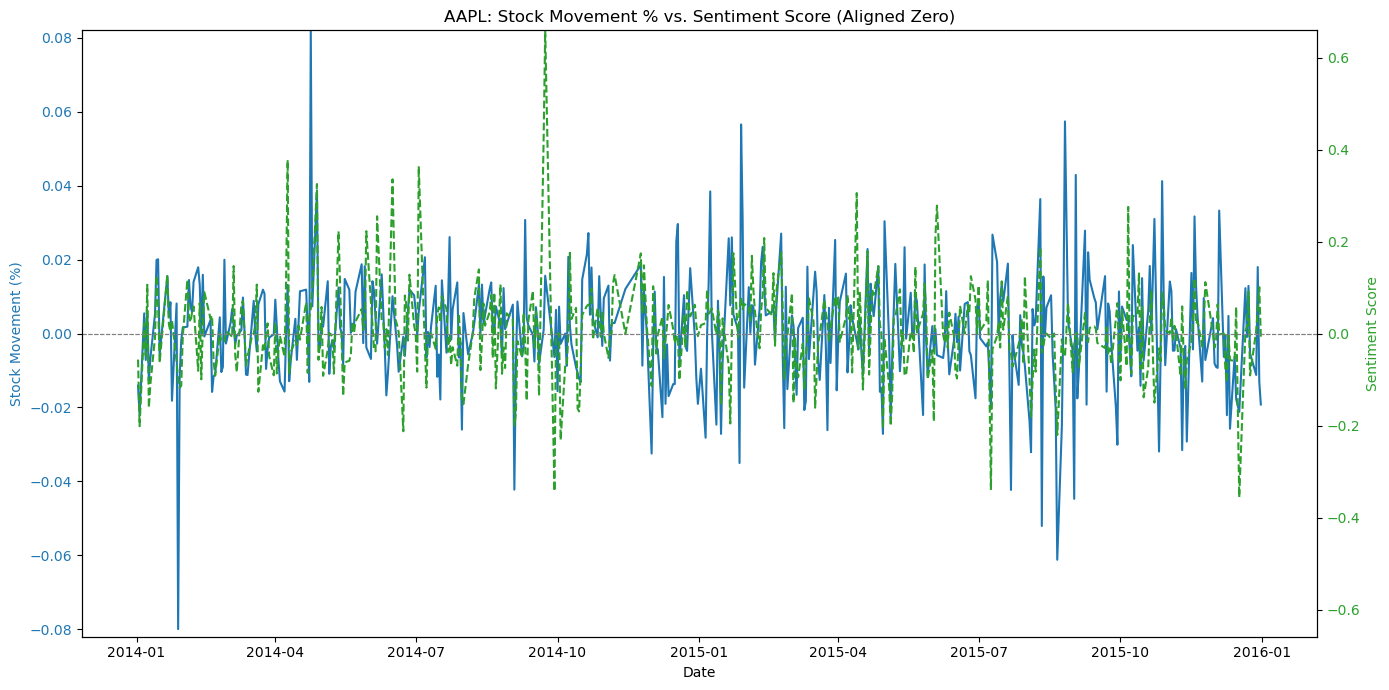

In [58]:
plot_sentiment_vs_stock_aligned_zero("AAPL", company_data, sentiment_data)


In [60]:
def prepare_sentiment_features(df, window_size=14):
    df = df.copy()
    df = df.sort_values('Date').reset_index(drop=True)

    # Create the binary target: 1 if next day's Movement % > 0
    df['Target'] = df['Movement %'].shift(-1).apply(lambda x: 1 if x > 0 else 0)

    # Generate rolling sentiment features
    for i in range(window_size):
        df[f'sentiment_t-{i+1}'] = df['Sentiment'].shift(i + 1)

    # Drop rows with missing values (due to shifting)
    df = df.dropna(subset=[f'sentiment_t-{i+1}' for i in range(window_size)] + ['Target'])

    return df

In [64]:
def train_sentiment_model(df, window_size=14):
    df = prepare_sentiment_features(df, window_size=window_size)

    # Features and target
    feature_cols = [f'sentiment_t-{i+1}' for i in range(window_size)]
    X = df[feature_cols]
    y = df['Target']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    # Train model
    #model = RandomForestClassifier(n_estimators=100, random_state=42)
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")

    return model, X_test, y_test, y_pred, accuracy


In [163]:
company = "AAPL"
merged_df = merge_sentiment_and_stock_data(company_data, sentiment_data, company)

results = []

# Iterate through different window sizes (from 1 to 100)
for window_size in range(1, 50):
    try:
        # Call the train_sentiment_model function
        model, X_test, y_test, y_pred, accuracy = train_sentiment_model(merged_df, window_size=window_size)
        
        # Store the result (window size and accuracy)
        results.append((window_size, accuracy))
        print(f"Window size: {window_size} → Accuracy: {accuracy:.4f}")
        
    except Exception as e:
        print(f"Window size {window_size} failed: {e}")

# Sort the results based on accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Print the sorted results
print("\nRanking of window sizes by accuracy:")
for rank, (window_size, accuracy) in enumerate(sorted_results, start=1):
    print(f"Rank {rank}: Window size {window_size} → Accuracy: {accuracy:.4f}")

# Optionally, print the best window size
best_window, best_acc = sorted_results[0]
print(f"\n✅ Best window size: {best_window} with accuracy: {best_acc:.4f}")


Test Accuracy: 0.4583
Window size: 1 → Accuracy: 0.4583
Test Accuracy: 0.5319
Window size: 2 → Accuracy: 0.5319
Test Accuracy: 0.4286
Window size: 3 → Accuracy: 0.4286
Test Accuracy: 0.4719
Window size: 4 → Accuracy: 0.4719
Test Accuracy: 0.4535
Window size: 5 → Accuracy: 0.4535
Test Accuracy: 0.5119
Window size: 6 → Accuracy: 0.5119
Test Accuracy: 0.5244
Window size: 7 → Accuracy: 0.5244
Test Accuracy: 0.5316
Window size: 8 → Accuracy: 0.5316
Test Accuracy: 0.5195
Window size: 9 → Accuracy: 0.5195
Test Accuracy: 0.4533
Window size: 10 → Accuracy: 0.4533
Test Accuracy: 0.4384
Window size: 11 → Accuracy: 0.4384
Test Accuracy: 0.4507
Window size: 12 → Accuracy: 0.4507
Test Accuracy: 0.4203
Window size: 13 → Accuracy: 0.4203
Test Accuracy: 0.4412
Window size: 14 → Accuracy: 0.4412
Test Accuracy: 0.4091
Window size: 15 → Accuracy: 0.4091
Test Accuracy: 0.3538
Window size: 16 → Accuracy: 0.3538
Test Accuracy: 0.4127
Window size: 17 → Accuracy: 0.4127
Test Accuracy: 0.4194
Window size: 18 → 

In [70]:
company = "AAPL"
merged_df = merge_sentiment_and_stock_data(company_data, sentiment_data, company)

results = []

# Iterate through different window sizes (from 1 to 100)
for window_size in range(1, 50):
    try:
        # Call the train_sentiment_model function
        model, X_test, y_test, y_pred, accuracy = train_sentiment_model(merged_df, window_size=window_size)
        
        # Store the result (window size and accuracy)
        results.append((window_size, accuracy))
        print(f"Window size: {window_size} → Accuracy: {accuracy:.4f}")
        
    except Exception as e:
        print(f"Window size {window_size} failed: {e}")

# Sort the results based on accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Print the sorted results
print("\nRanking of window sizes by accuracy:")
for rank, (window_size, accuracy) in enumerate(sorted_results, start=1):
    print(f"Rank {rank}: Window size {window_size} → Accuracy: {accuracy:.4f}")

# Optionally, print the best window size
best_window, best_acc = sorted_results[0]
print(f"\n✅ Best window size: {best_window} with accuracy: {best_acc:.4f}")


Test Accuracy: 0.4688
Window size: 1 → Accuracy: 0.4688
Test Accuracy: 0.4362
Window size: 2 → Accuracy: 0.4362
Test Accuracy: 0.4615
Window size: 3 → Accuracy: 0.4615
Test Accuracy: 0.4382
Window size: 4 → Accuracy: 0.4382
Test Accuracy: 0.4651
Window size: 5 → Accuracy: 0.4651
Test Accuracy: 0.4762
Window size: 6 → Accuracy: 0.4762
Test Accuracy: 0.5000
Window size: 7 → Accuracy: 0.5000
Test Accuracy: 0.4557
Window size: 8 → Accuracy: 0.4557
Test Accuracy: 0.4935
Window size: 9 → Accuracy: 0.4935
Test Accuracy: 0.5333
Window size: 10 → Accuracy: 0.5333
Test Accuracy: 0.5342
Window size: 11 → Accuracy: 0.5342
Test Accuracy: 0.4789
Window size: 12 → Accuracy: 0.4789
Test Accuracy: 0.4928
Window size: 13 → Accuracy: 0.4928
Test Accuracy: 0.4853
Window size: 14 → Accuracy: 0.4853
Test Accuracy: 0.3939
Window size: 15 → Accuracy: 0.3939
Test Accuracy: 0.4308
Window size: 16 → Accuracy: 0.4308
Test Accuracy: 0.4286
Window size: 17 → Accuracy: 0.4286
Test Accuracy: 0.4194
Window size: 18 → 

In [72]:
def prepare_movement_features(df, window_size=14):
    df = df.copy()
    df = df.sort_values('Date').reset_index(drop=True)

    # Create binary target: 1 if next day's Movement % > 0
    df['Target'] = df['Movement %'].shift(-1).apply(lambda x: 1 if x > 0 else 0)

    # Create lag features using Movement %
    for i in range(window_size):
        df[f'movement_t-{i+1}'] = df['Movement %'].shift(i + 1)

    # Drop rows with NaNs due to shifting
    df = df.dropna(subset=[f'movement_t-{i+1}' for i in range(window_size)] + ['Target'])

    return df


In [74]:
def train_movement_model(df, window_size=14):
    df = prepare_movement_features(df, window_size=window_size)

    feature_cols = [f'movement_t-{i+1}' for i in range(window_size)]
    X = df[feature_cols]
    y = df['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    # You can swap in any model here
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")

    return model, X_test, y_test, y_pred, accuracy


In [76]:
results = []
for window_size in range(1, 50):
    try:
        model, X_test, y_test, y_pred, accuracy = train_movement_model(merged_df, window_size=window_size)
        results.append((window_size, accuracy))
        print(f"Window size: {window_size} → Accuracy: {accuracy:.4f}")
    except Exception as e:
        print(f"Window size {window_size} failed: {e}")


Test Accuracy: 0.4960
Window size: 1 → Accuracy: 0.4960
Test Accuracy: 0.5657
Window size: 2 → Accuracy: 0.5657
Test Accuracy: 0.5538
Window size: 3 → Accuracy: 0.5538
Test Accuracy: 0.5219
Window size: 4 → Accuracy: 0.5219
Test Accuracy: 0.4502
Window size: 5 → Accuracy: 0.4502
Test Accuracy: 0.4821
Window size: 6 → Accuracy: 0.4821
Test Accuracy: 0.5280
Window size: 7 → Accuracy: 0.5280
Test Accuracy: 0.5280
Window size: 8 → Accuracy: 0.5280
Test Accuracy: 0.4840
Window size: 9 → Accuracy: 0.4840
Test Accuracy: 0.4960
Window size: 10 → Accuracy: 0.4960
Test Accuracy: 0.5040
Window size: 11 → Accuracy: 0.5040
Test Accuracy: 0.5060
Window size: 12 → Accuracy: 0.5060
Test Accuracy: 0.5060
Window size: 13 → Accuracy: 0.5060
Test Accuracy: 0.4819
Window size: 14 → Accuracy: 0.4819
Test Accuracy: 0.4980
Window size: 15 → Accuracy: 0.4980
Test Accuracy: 0.4779
Window size: 16 → Accuracy: 0.4779
Test Accuracy: 0.4556
Window size: 17 → Accuracy: 0.4556
Test Accuracy: 0.4879
Window size: 18 → 

In [78]:
def prepare_price_features(df, window_size=14):
    df = df.copy()
    df = df.sort_values('Date').reset_index(drop=True)

    # Create binary target: 1 if next day's Movement % > 0
    df['Target'] = df['Movement %'].shift(-1).apply(lambda x: 1 if x > 0 else 0)

    price_cols = ['Movement %', 'Open', 'High', 'Low', 'Close', 'Volume']

    # Generate lagged features for each price-related column
    for col in price_cols:
        for i in range(window_size):
            df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)

    # Drop rows with NaNs from shifting
    lagged_cols = [f'{col}_t-{i+1}' for col in price_cols for i in range(window_size)]
    df = df.dropna(subset=lagged_cols + ['Target'])

    return df


In [83]:
def train_price_model(df, window_size=14):
    df = prepare_price_features(df, window_size=window_size)

    # Build the feature list
    price_cols = ['Movement %', 'Open', 'High', 'Low', 'Close']
    feature_cols = [f'{col}_t-{i+1}' for col in price_cols for i in range(window_size)]

    X = df[feature_cols]
    y = df['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")

    return model, X_test, y_test, y_pred, accuracy


In [84]:
for window_size in range(1, 50):
    try:
        model, X_test, y_test, y_pred, accuracy = train_price_model(merged_df, window_size=window_size)
        results.append((window_size, accuracy))
        print(f"Window size: {window_size} → Accuracy: {accuracy:.4f}")
    except Exception as e:
        print(f"Window size {window_size} failed: {e}")


Test Accuracy: 0.4603
Window size: 1 → Accuracy: 0.4603
Test Accuracy: 0.4303
Window size: 2 → Accuracy: 0.4303
Test Accuracy: 0.4940
Window size: 3 → Accuracy: 0.4940
Test Accuracy: 0.5219
Window size: 4 → Accuracy: 0.5219
Test Accuracy: 0.4582
Window size: 5 → Accuracy: 0.4582
Test Accuracy: 0.5060
Window size: 6 → Accuracy: 0.5060
Test Accuracy: 0.5720
Window size: 7 → Accuracy: 0.5720
Test Accuracy: 0.5320
Window size: 8 → Accuracy: 0.5320
Test Accuracy: 0.5280
Window size: 9 → Accuracy: 0.5280
Test Accuracy: 0.4960
Window size: 10 → Accuracy: 0.4960
Test Accuracy: 0.5200
Window size: 11 → Accuracy: 0.5200
Test Accuracy: 0.4980
Window size: 12 → Accuracy: 0.4980
Test Accuracy: 0.5301
Window size: 13 → Accuracy: 0.5301
Test Accuracy: 0.5582
Window size: 14 → Accuracy: 0.5582
Test Accuracy: 0.5502
Window size: 15 → Accuracy: 0.5502
Test Accuracy: 0.5100
Window size: 16 → Accuracy: 0.5100


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4919
Window size: 17 → Accuracy: 0.4919


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4355
Window size: 18 → Accuracy: 0.4355


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5242
Window size: 19 → Accuracy: 0.5242


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4758
Window size: 20 → Accuracy: 0.4758


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4597
Window size: 21 → Accuracy: 0.4597


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5547
Window size: 22 → Accuracy: 0.5547


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5182
Window size: 23 → Accuracy: 0.5182


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5506
Window size: 24 → Accuracy: 0.5506


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5142
Window size: 25 → Accuracy: 0.5142


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4656
Window size: 26 → Accuracy: 0.4656


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5488
Window size: 27 → Accuracy: 0.5488


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5244
Window size: 28 → Accuracy: 0.5244


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5772
Window size: 29 → Accuracy: 0.5772


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4797
Window size: 30 → Accuracy: 0.4797


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5041
Window size: 31 → Accuracy: 0.5041


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5429
Window size: 32 → Accuracy: 0.5429


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5388
Window size: 33 → Accuracy: 0.5388


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5510
Window size: 34 → Accuracy: 0.5510


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5347
Window size: 35 → Accuracy: 0.5347


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5837
Window size: 36 → Accuracy: 0.5837


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5492
Window size: 37 → Accuracy: 0.5492


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5492
Window size: 38 → Accuracy: 0.5492


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5615
Window size: 39 → Accuracy: 0.5615


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5574
Window size: 40 → Accuracy: 0.5574


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5615
Window size: 41 → Accuracy: 0.5615


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5720
Window size: 42 → Accuracy: 0.5720


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5309
Window size: 43 → Accuracy: 0.5309


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4897
Window size: 44 → Accuracy: 0.4897


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4691
Window size: 45 → Accuracy: 0.4691


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5267
Window size: 46 → Accuracy: 0.5267


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5331
Window size: 47 → Accuracy: 0.5331


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.4917
Window size: 48 → Accuracy: 0.4917


C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_t-{i+1}'] = df[col].shift(i + 1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_75388\2397156645.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

Test Accuracy: 0.5579
Window size: 49 → Accuracy: 0.5579
